# Project 2 - Classification 

##### Ronghan Che (rche@wpi.edu) Vagmi Bhagavathula (nbbhagavathula@wpi.edu)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt 
import os
from glob import glob
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

## Task 2 - EDA

### Load training data

In [3]:
pred_path = "dataset/seg_pred/seg_pred/"
test_path = "dataset/seg_test/seg_test/"
train_path = "dataset/seg_train/seg_train/"

# create a dictionary <key = class, object = label>
class_name = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_label = {class_name:i for i, class_name in enumerate(class_name)}

train_labels = []
train_samples = []
image_dimensions = []
for folder in os.listdir(train_path):
    # ignore hidden files
    if not folder.startswith('.'):
        label = class_label[folder]
        files = glob(pathname = str(train_path + folder + "/*.jpg"))
        for f in files:
            train_labels.append(label)
            image = cv2.imread(f)
            image_dimensions.append(image.shape)
            train_samples.append(image)
train_labels = np.array(train_labels, dtype = 'int')
print('Training data size:', len(train_labels))

Training data size: 14034


### Load testing data

In [4]:
test_labels = []
test_samples = []
for folder in os.listdir(test_path):
    # ignore hidden files
    if not folder.startswith('.'):
        label = class_label[folder]
        files = glob(pathname = str(test_path + folder + "/*.jpg"))
        for f in files:
            test_labels.append(label)
            image = cv2.imread(f)
            test_samples.append(image)
test_labels = np.array(test_labels, dtype = 'int')
print('Testing data size:', len(test_labels))

Testing data size: 3000


### Class proportions

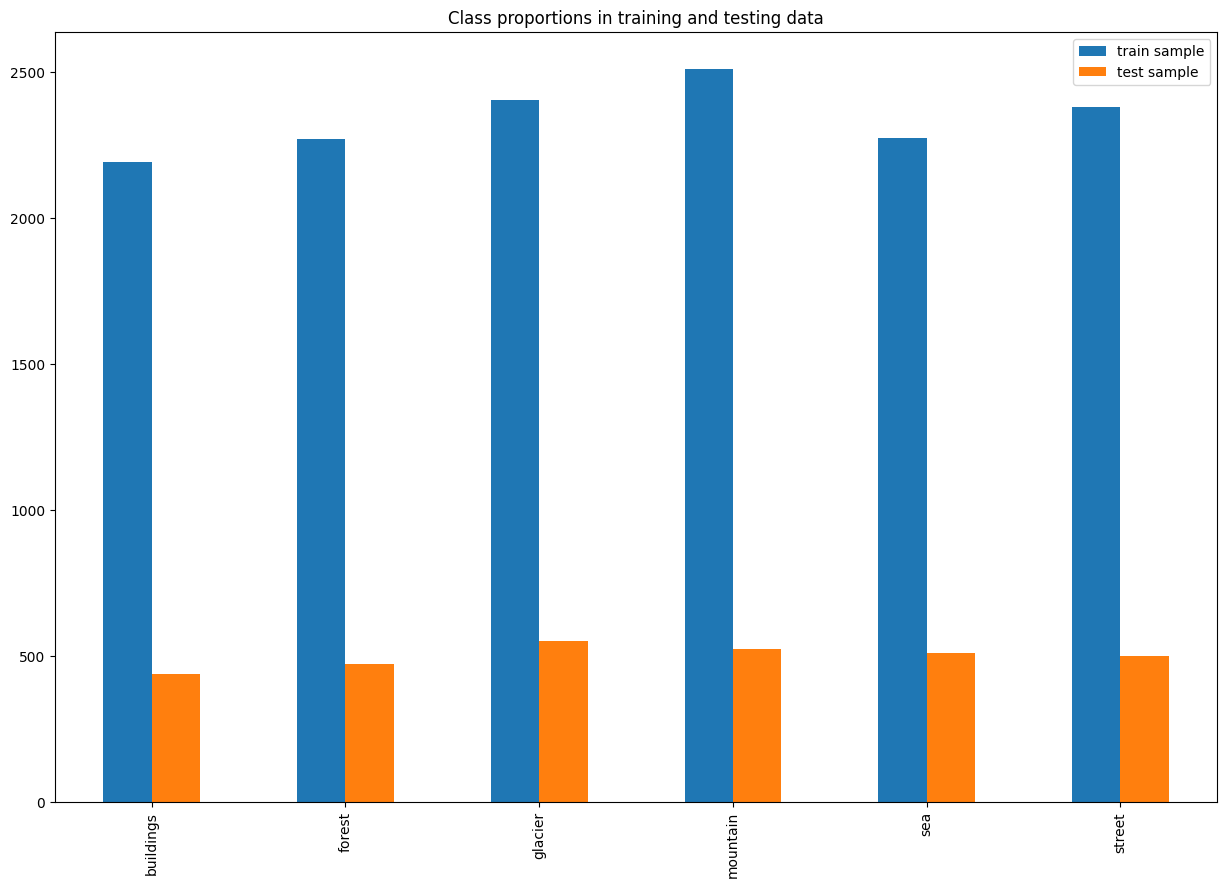

In [5]:
_, train_labels_counts = np.unique(train_labels, return_counts=True)
_, test_labels_counts = np.unique(test_labels, return_counts=True)
label_df = pd.DataFrame({"train sample":train_labels_counts, "test sample":test_labels_counts},
             index = class_name 
             )
label_df.plot(kind='bar', figsize=(15,10))
plt.title('Class proportions in training and testing data')
plt.legend(loc = 'upper right')
plt.show()

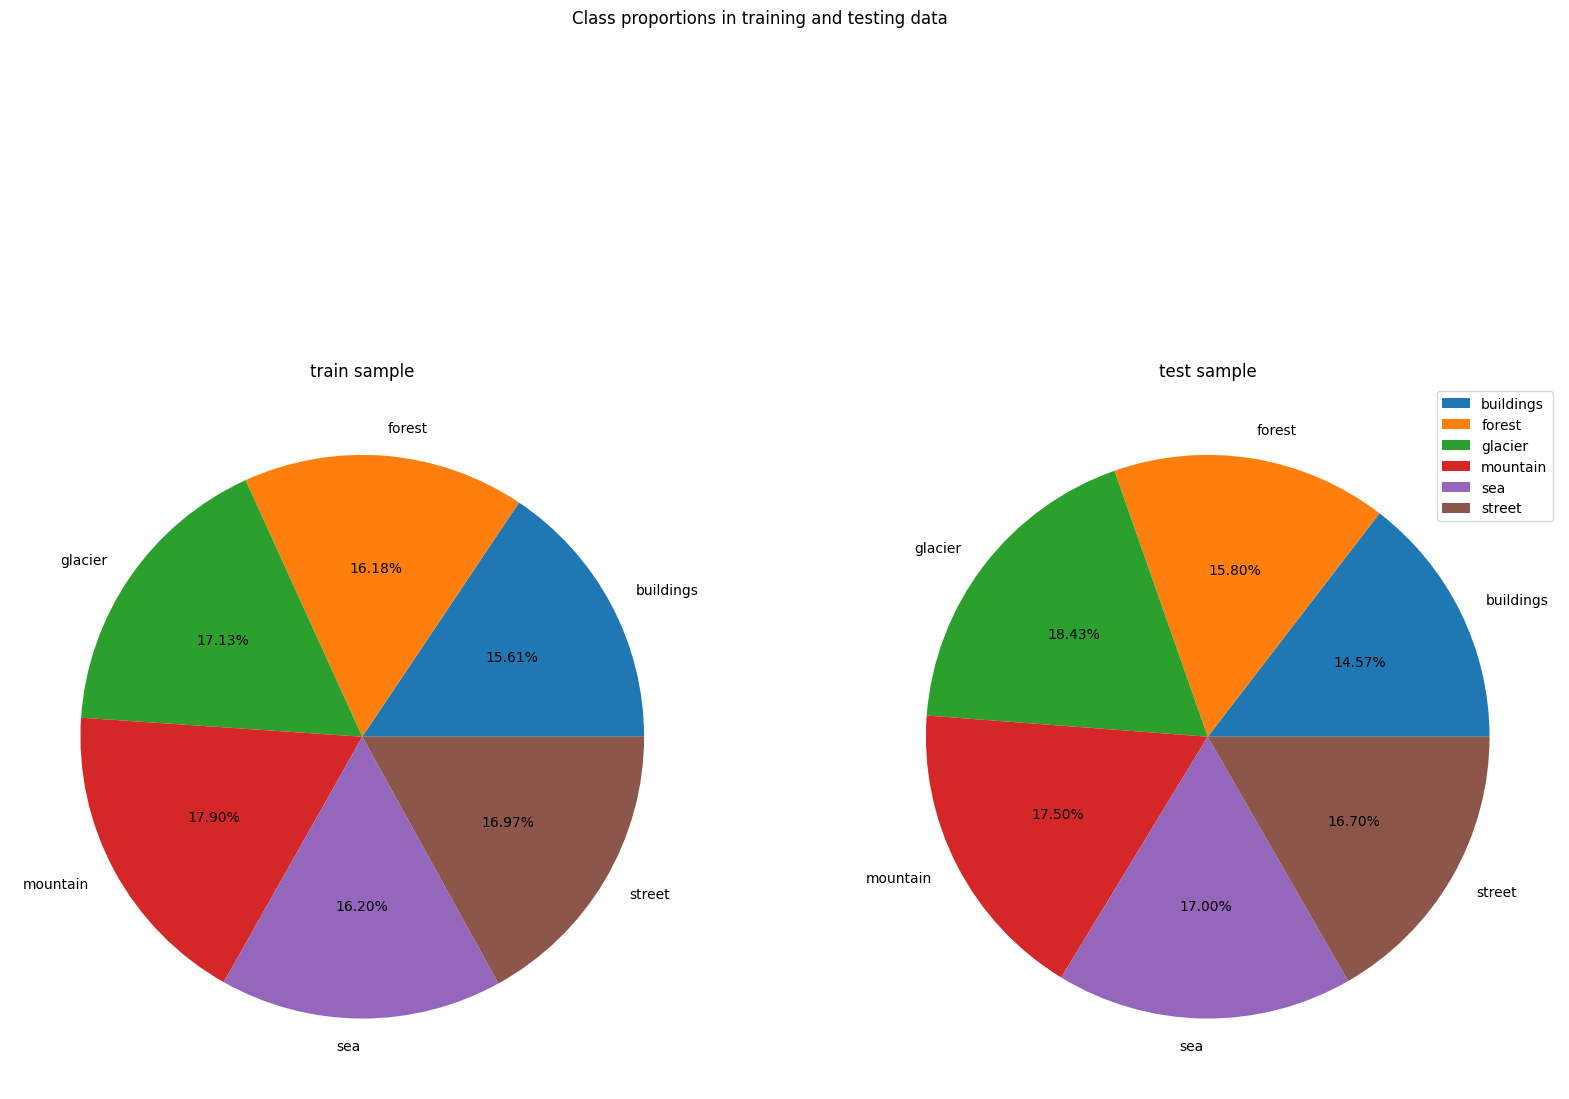

In [6]:
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(121)
ax1.pie(label_df['train sample'], labels=class_label, autopct='%1.2f%%')
ax1.set_title('train sample')
ax2 = fig.add_subplot(122)
ax2.pie(label_df['test sample'], labels=class_label, autopct='%1.2f%%')
ax2.set_title('test sample')
plt.suptitle('Class proportions in training and testing data')
plt.legend(loc = 'upper right')
plt.show()

### Images' dimensions in training data

In [7]:
dimension_df = pd.DataFrame(image_dimensions, columns = ['width', 'height', 'channel'])
dimension_df = dimension_df.groupby(['width', 'height', 'channel'], as_index =False).size()
dimension_df = dimension_df.sort_values(by=['size'],ascending=False)
dimension_df

,width,height,channel,size
30,150,150,3,13986
10,113,150,3,7
9,111,150,3,3
19,135,150,3,3
27,146,150,3,2
25,144,150,3,2
7,108,150,3,2
18,134,150,3,2
23,142,150,3,2
14,123,150,3,2


## Task 3 - Problem Definition (Revisiting Task 1)


## Task 4 - Preprocessing 

### Reshape all images to (150x150) pixels


In [8]:
IMAGE_SIZE = (150, 150)

# resize training data
train_images = []
for i in train_samples:
    image = cv2.resize(i, IMAGE_SIZE)
    train_images.append(image)

# resize testing data
test_images = []
for i in test_samples:
    image = cv2.resize(i, IMAGE_SIZE)
    test_images.append(image)

train_samples =  np.array(train_images, dtype = 'float32')
test_samples = np.array(test_images, dtype = 'object')
print('train images shape', train_samples.shape)
print('test images shape', test_samples.shape)

train images shape (14034, 150, 150, 3)
test images shape (3000, 150, 150, 3)


### Reshape to 2D Array

In [9]:
train_nsamples, train_x, train_y, train_nrgb = train_samples.shape
training_data = train_samples.reshape((train_nsamples,train_x*train_y*train_nrgb))

test_nsamples, test_x, test_y, test_nrgb = test_samples.shape
test_data = test_samples.reshape((test_nsamples, test_x*test_y*test_nrgb))

## Task 5 - Model Selection, Training, and Optimization 

In [10]:
# KNN
knn_model =KNeighborsClassifier(n_neighbors=7)
knn_model.fit(training_data, train_labels)

knn_labels_pred = knn_model.predict(test_data)

In [11]:
# Decision Forest
dt_model = DecisionTreeClassifier()
dt_model.fit(training_data, train_labels)

dt_labels_pred = dt_model.predict(test_data)

# Task 6 - Model Evaluation

### KNN model evaluation

In [12]:
# Confusion Matrix
print(confusion_matrix(knn_labels_pred, test_labels))


[[  7   0   0   0   0   4]
 [ 17 192   0   0   9  56]
 [ 41  10 209  41  68  71]
 [199  85 212 419 210 140]
 [163 178 130  65 222 162]
 [ 10   9   2   0   1  68]]


In [13]:
# Accuracy, Precision, F1
print(classification_report(knn_labels_pred, test_labels))

              precision    recall  f1-score   support

           0       0.02      0.64      0.03        11
           1       0.41      0.70      0.51       274
           2       0.38      0.47      0.42       440
           3       0.80      0.33      0.47      1265
           4       0.44      0.24      0.31       920
           5       0.14      0.76      0.23        90

    accuracy                           0.37      3000
   macro avg       0.36      0.52      0.33      3000
weighted avg       0.57      0.37      0.41      3000



### Decision Tree Evaluation

In [14]:
## Confusion Matrix
print(confusion_matrix(dt_labels_pred, test_labels))

[[128  47  68  60  70  80]
 [ 45 282  17  12  32  73]
 [ 51  13 236  84 103  36]
 [ 71  18  91 247 105  35]
 [ 66  23  88  97 155  43]
 [ 76  91  53  25  45 234]]


In [15]:
## Accuracy, Precision, F1
print(classification_report(dt_labels_pred, test_labels))

              precision    recall  f1-score   support

           0       0.29      0.28      0.29       453
           1       0.59      0.61      0.60       461
           2       0.43      0.45      0.44       523
           3       0.47      0.44      0.45       567
           4       0.30      0.33      0.32       472
           5       0.47      0.45      0.46       524

    accuracy                           0.43      3000
   macro avg       0.43      0.43      0.43      3000
weighted avg       0.43      0.43      0.43      3000

